In [1]:
import pandas as pd

# Load the dataset to inspect the data structure
file_path = './faithful.csv'
faithful_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
faithful_data.head()


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [2]:
# Checking for missing values, data types, and basic statistical summary
missing_values = faithful_data.isnull().sum()
data_types = faithful_data.dtypes
summary_statistics = faithful_data.describe()

missing_values, data_types, summary_statistics


(eruptions    0
 waiting      0
 dtype: int64,
 eruptions    float64
 waiting        int64
 dtype: object,
         eruptions     waiting
 count  272.000000  272.000000
 mean     3.487783   70.897059
 std      1.141371   13.594974
 min      1.600000   43.000000
 25%      2.162750   58.000000
 50%      4.000000   76.000000
 75%      4.454250   82.000000
 max      5.100000   96.000000)

# Problem 1 . (a)

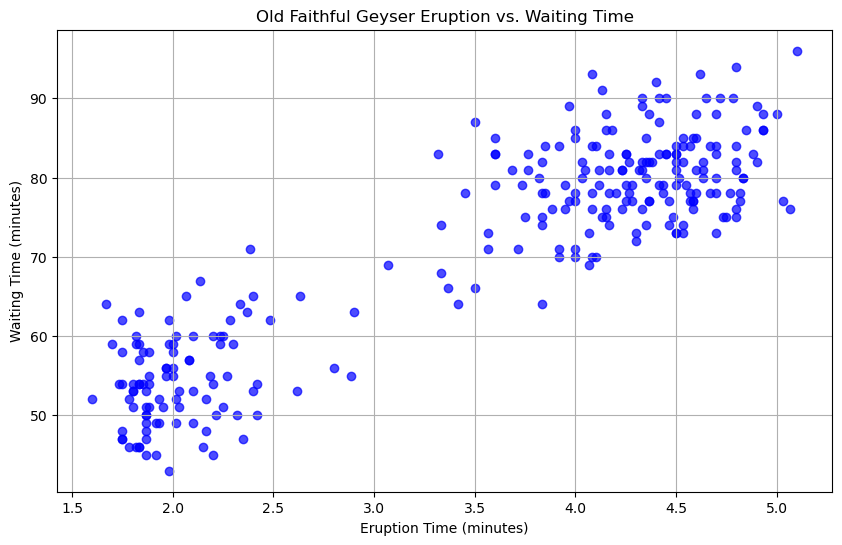

In [3]:
import matplotlib.pyplot as plt

# Plotting a scatter plot of eruption time vs. waiting time
plt.figure(figsize=(10, 6))
plt.scatter(faithful_data['eruptions'], faithful_data['waiting'], color='b', alpha=0.7)
plt.title('Old Faithful Geyser Eruption vs. Waiting Time')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)
plt.show()


# Problem 2 (a)

In [11]:
import numpy as np

# Extracting features 
X = faithful_data[['eruptions', 'waiting']].values

# K-means algorithm parameters
k = 2  # Based on visual identification of clusters
max_iters = 100
tolerance = 1e-4

# K-means algorithm
class KMeansScratch:
    def __init__(self, k, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance
        self.centroids = None

    def fit(self, X):
        # Randomly initialize centroids by selecting k random points from the dataset
        np.random.seed(0)
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        for i in range(self.max_iters):
            # Assign clusters based on the closest centroid
            clusters = self._assign_clusters(X)

            # Calculate new centroids from the clusters
            new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(self.k)])

            # Check for convergence (if the centroids change less than the tolerance)
            if np.linalg.norm(self.centroids - new_centroids) < self.tolerance:
                break

            # Update centroids
            self.centroids = new_centroids

        # Store final cluster assignments
        self.labels_ = clusters

    def _assign_clusters(self, X):
        # Calculate distances from each point to each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        # Assign each point to the closest centroid
        return np.argmin(distances, axis=1)

# Initialize and fit the model
kmeans_scratch = KMeansScratch(k=k, max_iters=max_iters, tolerance=tolerance)
kmeans_scratch.fit(X)

# Display the final centroids and cluster labels
kmeans_scratch.centroids, kmeans_scratch.labels_


(array([[ 4.29793023, 80.28488372],
        [ 2.09433   , 54.75      ]]),
 array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0]))

# Problem 2 (b)

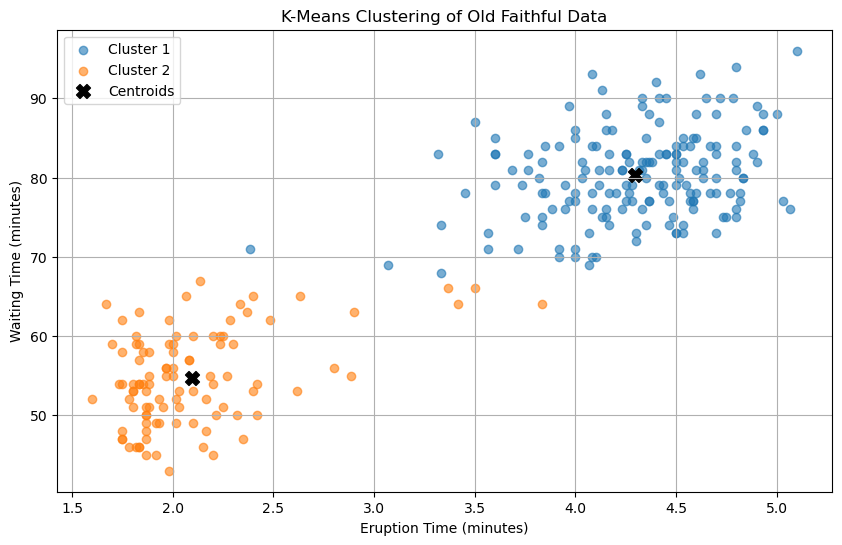

In [12]:
import matplotlib.pyplot as plt


centroids = np.array([[ 4.29793023, 80.28488372],
        [ 2.09433   , 54.75      ]]) 
labels = np.array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0])

# Plotting
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for cluster_idx in range(k):
    cluster_points = X[labels == cluster_idx]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_idx+1}', alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=100, label='Centroids')

# Labeling the plot
plt.title('K-Means Clustering of Old Faithful Data')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
print("Data points in X:", len(X))
print("Labels:", len(labels))


Data points in X: 272
Labels: 267


# Problem 2 (c)

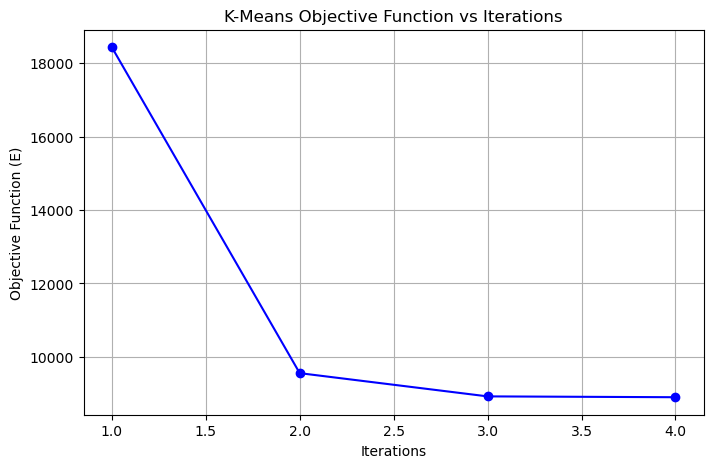

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def k_means_with_objective_tracking(X, k, max_iters=100):
    # Randomly initialize centroids
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    previous_centroids = centroids.copy()
    labels = np.zeros(X.shape[0])
    objective_values = []  # To track the objective function E

    for iteration in range(max_iters):
        # Assign points to the nearest cluster
        for i, point in enumerate(X):
            distances = np.linalg.norm(point - centroids, axis=1)
            labels[i] = np.argmin(distances)
        
        # Update centroids
        new_centroids = np.zeros_like(centroids)
        for cluster_idx in range(k):
            cluster_points = X[labels == cluster_idx]
            if len(cluster_points) > 0:
                new_centroids[cluster_idx] = np.mean(cluster_points, axis=0)
        
        # Calculate the objective function
        E = 0
        for cluster_idx in range(k):
            cluster_points = X[labels == cluster_idx]
            E += np.sum((cluster_points - centroids[cluster_idx])**2)
        objective_values.append(E)
        
        # Stop if centroids don't change
        if np.allclose(previous_centroids, new_centroids):
            break
        
        centroids = new_centroids
        previous_centroids = centroids.copy()

    return labels, centroids, objective_values

# Run k-means and get objective values
k = 2  # Based on the scatter plot analysis
labels, final_centroids, objective_values = k_means_with_objective_tracking(X, k)

# Plot the objective function vs iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(objective_values) + 1), objective_values, marker='o', color='b')
plt.title('K-Means Objective Function vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Objective Function (E)')
plt.grid()
plt.show()


# Problem 2 (d)

Best Objective Function Value (E): 8901.76872094721
Final Centroids from Best Run:
 [[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]


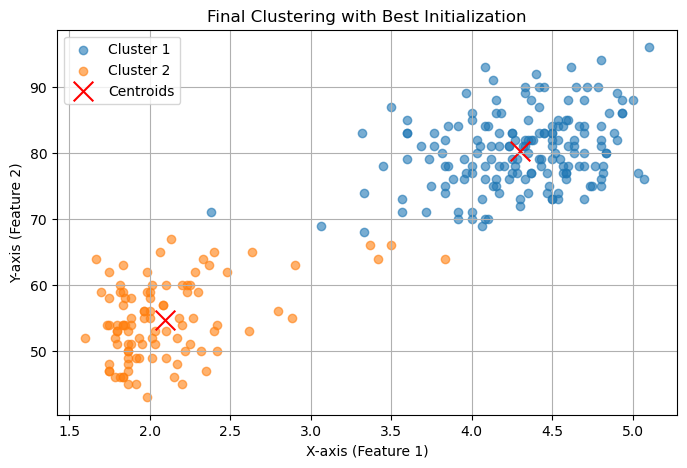

In [14]:
# Run k-means with multiple random initializations
best_labels = None
best_centroids = None
best_E = float('inf')  # Track the best objective function value

for _ in range(10):  # Run 10 times
    labels, centroids, objective_values = k_means_with_objective_tracking(X, k)
    final_E = objective_values[-1]  # Last objective function value
    if final_E < best_E:
        best_E = final_E
        best_labels = labels
        best_centroids = centroids

print("Best Objective Function Value (E):", best_E)
print("Final Centroids from Best Run:\n", best_centroids)

# Plot clusters with the best run
plt.figure(figsize=(8, 5))
for cluster_idx in range(k):
    cluster_points = X[best_labels == cluster_idx]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_idx+1}', alpha=0.6)
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], color='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering with Best Initialization')
plt.xlabel('X-axis (Feature 1)')
plt.ylabel('Y-axis (Feature 2)')
plt.legend()
plt.grid()
plt.show()


Yes, the K-means algorithm managed to find distinct clusters that are visually aligned with the natural groupings of the data identified in Problem 1. In the first plot, the data appears to form two natural clusters. The K-means algorithm effectively captured these clusters as shown in the second plot, where the clusters are well-separated, and the centroids are positioned close to the centers of these groups.